In [1]:
import matplotlib.pyplot as plt
import numpy as np
import scipy as sp
import csv
import re
import pandas as pd
import os,glob

In [2]:
input_name  = '/content/drive/MyDrive/Academics/UW-2nd Cycle/Sem 2 - Physics Lab B/ha_input_be80/be_80mbar_0.01M_IONIZ.txt.csv'

In [3]:
input_path_80         = '/content/drive/MyDrive/Academics/UW-2nd Cycle/Sem 2 - Physics Lab B/ha_input_be80'
input_name_list_80   = []
for filename in glob.glob(os.path.join(input_path_80, '*.csv')):
  input_name_list_80.append(filename)

input_path_250         = '/content/drive/MyDrive/Academics/UW-2nd Cycle/Sem 2 - Physics Lab B/ha_input_be250'
input_name_list_250   = []
for filename in glob.glob(os.path.join(input_path_250, '*.csv')):
  input_name_list_250.append(filename)

In [4]:
#for i in range (0, len(input_name_list_80)):
  #print(input_name_list_80[i][92:-15])

#for i in range (0, len(input_name_list_250)):
  #print(input_name_list_250[i][94:-15])
float(input_path_250[len(input_path_250)-2:]), input_name_list_250[1][83:-14], input_path_80[len(input_path_80)-2:], input_name_list_80[1][82:-14]


(50.0, 'be_250mbar_0.01M', '80', 'be_80mbar_0.02M')

In [5]:
for i in range (0, len(input_name_list_250)):
  print(float(input_name_list_250[i][94:-15]))

0.015
0.01
0.025
0.02
0.035
0.03
0.08
12.0
14.0
16.0
18.0
22.5
25.0
30.0
0.5
0.7
0.011
0.06
0.1
0.15
0.3
0.9
1.0
1.1
1.5
1.8
2.25
3.25
4.0
7.0
5.5
8.0
10.0


In [6]:
def prev_list(inFileName, check_bar):
  new_Namelist    = np.zeros((len(inFileName),2))
  old_Namelist    = []
  i_th=0
  #float(input_path_250[len(input_path_250)-2:])
  for iName in inFileName:
    if check_bar == 80:
      old_Namelist.append([float(iName[92:-15]), iName[82:-14], iName])
    if check_bar == 50:
      old_Namelist.append([float(iName[94:-15]), iName[83:-14], iName])
    i_th+=1
  return old_Namelist#new_Namelist
def conv_to_df(inFileName):
  return pd.DataFrame(prev_list(inFileName, check_bar),columns=['energy','name','path'])
def takeSecond(inFileName):
  return conv_to_df(inFileName['energy'])

In [7]:
def new_list(inFileName):
  df  = conv_to_df(inFileName).sort_values(by=['energy'],ignore_index=True)
  #df  = conv_to_df(inFileName).reset_index(drop=True)
  return df

In [8]:
#print(new_list(input_name_list_250).index)

In [9]:
#input_name_list_80[0][:82]
def outName(inFileName):
  OutNames  = []
  OutNames.append(inFileName[82:-14])
  return OutNames

In [10]:
def data_frame(inFileName):
  cereal_df = pd.read_csv((inFileName))
  return cereal_df

In [11]:
def new_range(ref_file, inFileName, threshold_e):
  count       = 0
  ref_d       = 0
  _d          = 0
  rangelist = data_frame(ref_file)['Depth']
  for ion_e in data_frame(ref_file)['Ionization']:
    if ion_e < threshold_e:
      ref_d = rangelist[count]
      break
    count +=1
  count = 0
  rangelist = data_frame(inFileName)['Depth']
  for ion_e in data_frame(inFileName)['Ionization']:
    if ion_e < threshold_e:
      _d = rangelist[count]
      break
    count +=1
  c = _d - ref_d
  return rangelist - c

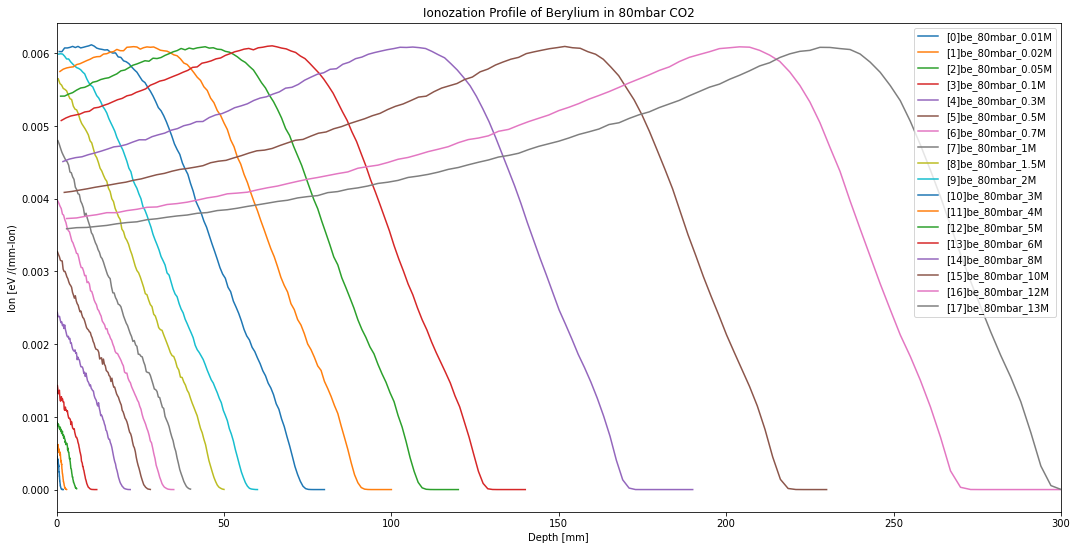

In [27]:
# for 80 mbar data
plt.figure(figsize=(18,9))
############# parameters
ref_num = 10
in_list = input_name_list_80
plot_name = 'Berylium in 80mbar CO2'
check_bar = 80
#############
n_th  = 0
for inFileName in new_list(in_list)['path']:
  plt.plot((1/(10**7))*data_frame(inFileName)['Depth'], data_frame(inFileName)['Ionization'], label= '[%s]%s' %(n_th,new_list(in_list)['name'][n_th]))
  n_th  += 1
#############
plt.legend()
plt.xlim(0,300)
plt.ylabel('Ion [eV /(mm-Ion)')
plt.xlabel('Depth [mm]')
plt.title('Ionozation Profile of %s' %plot_name)
plt.savefig('/content/drive/MyDrive/Academics/UW-2nd Cycle/Sem 2 - Physics Lab B/ha_plotPictures/Ionz_Profile_%s'%plot_name)
plt.show()


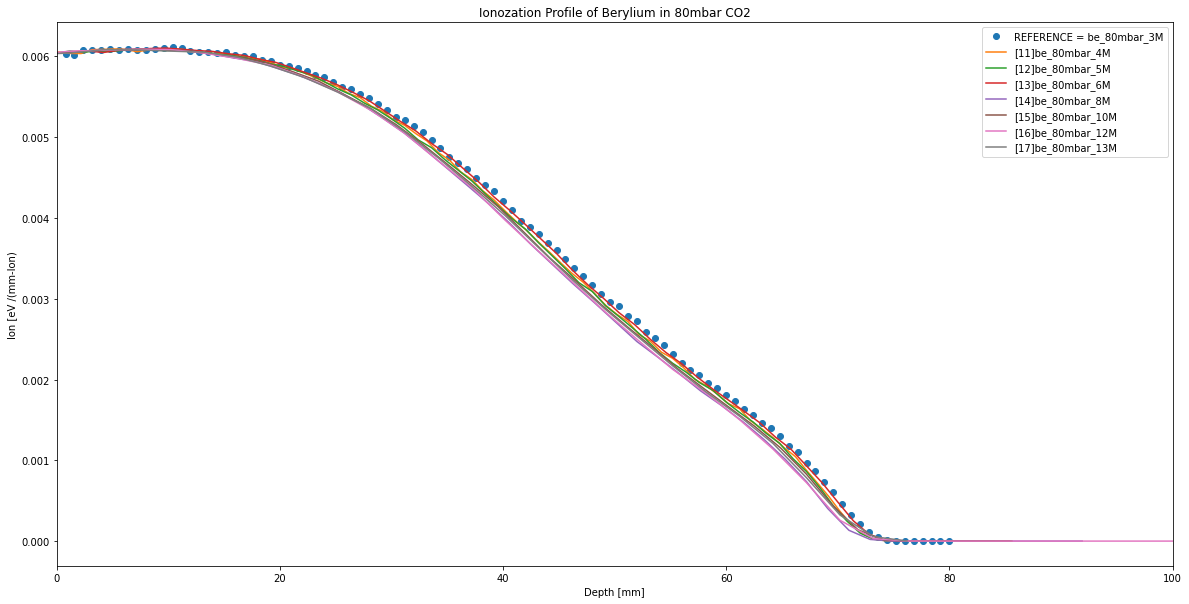

In [28]:
# shifting the data
############# parameters
ref_num = 10
in_list = input_name_list_80
plot_name = 'Berylium in 80mbar CO2'
check_bar = 80
#############
plt.figure(figsize=(20,10))
plt.plot((1/(10**7))*data_frame(new_list(in_list)['path'][ref_num])['Depth'], data_frame(new_list(in_list)['path'][ref_num])['Ionization'], 'o', label= 'REFERENCE = %s'%new_list(in_list)['name'][ref_num])
#############
n_th  = 0
for inFileName in new_list(in_list)['path']:
  ref_depth     = (1/(10**7))*new_range(new_list(in_list)['path'][ref_num], inFileName, 0.001)
  #depth         =   
  ion           = data_frame(inFileName)['Ionization']
  label_name    = new_list(in_list)['name'][n_th]
  index_num     = new_list(in_list).index[n_th]
  if n_th <= ref_num: 
    n_th +=1
    continue
  plt.plot(ref_depth, ion, label= '[%s]%s' %(index_num,label_name))
  n_th  += 1
#############
plt.legend()
plt.xlim(0,100)
plt.ylabel('Ion [eV /(mm-Ion)')
plt.xlabel('Depth [mm]')
plt.title('Ionozation Profile of %s'%plot_name)
plt.savefig('/content/drive/MyDrive/Academics/UW-2nd Cycle/Sem 2 - Physics Lab B/ha_plotPictures/Ionz_Profile_%s_shift'%plot_name)
plt.show()


Good for energy range 3 Mev to 10 MeV

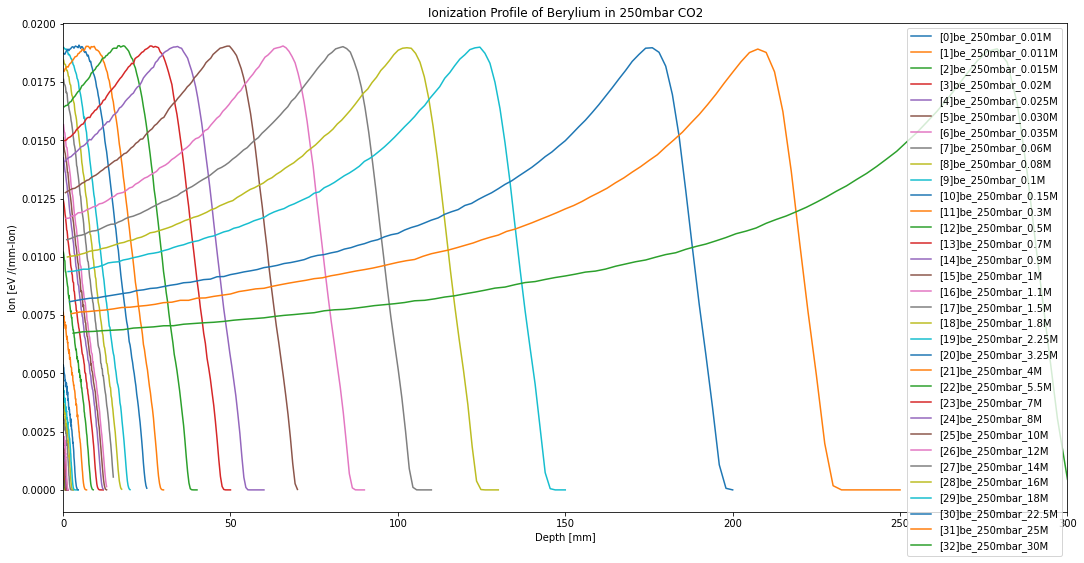

In [29]:
# for 250 mbar data
plt.figure(figsize=(18,9))
############# parameters
ref_num = 10
in_list = input_name_list_250
plot_name = 'Berylium in 250mbar CO2'
check_bar = 50
#############
n_th  = 0
for inFileName in new_list(in_list)['path']:
  plt.plot((1/(10**7))*data_frame(inFileName)['Depth'], data_frame(inFileName)['Ionization'], label= '[%s]%s' %(n_th,new_list(in_list)['name'][n_th]))
  n_th  += 1
#############
plt.legend()
plt.xlim(0,300)
plt.ylabel('Ion [eV /(mm-Ion)')
plt.xlabel('Depth [mm]')
plt.title('Ionization Profile of %s' %plot_name)
plt.savefig('/content/drive/MyDrive/Academics/UW-2nd Cycle/Sem 2 - Physics Lab B/ha_plotPictures/Ionz_Profile_%s'%plot_name)
plt.show()


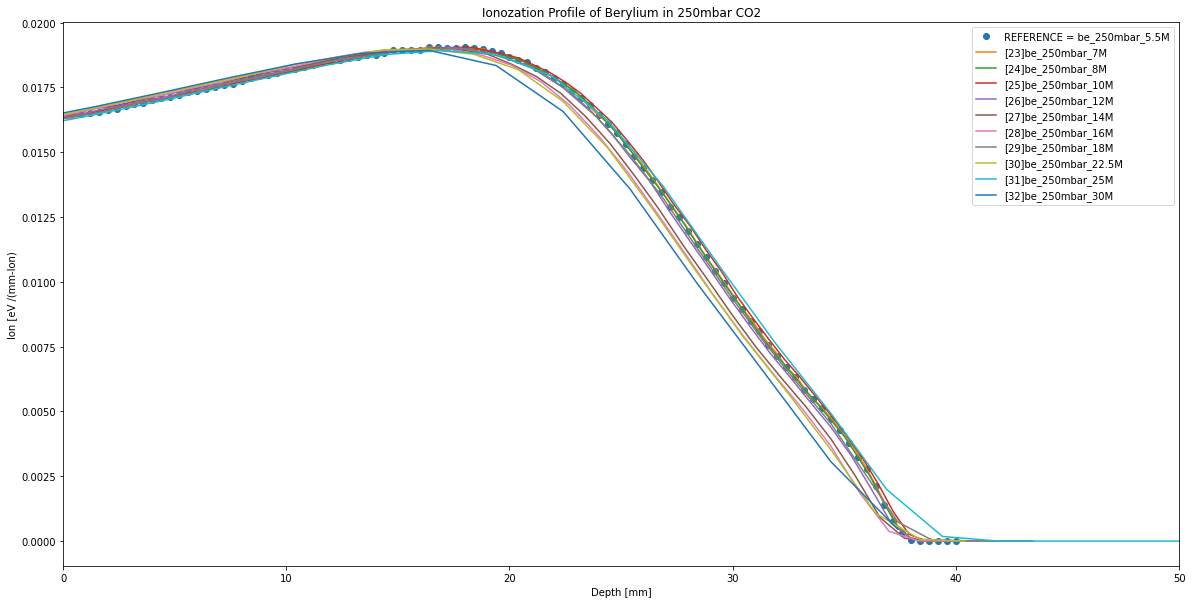

In [30]:
# shifting the data
############# parameters
ref_num = 22
in_list = input_name_list_250
plot_name = 'Berylium in 250mbar CO2'
check_bar = 50
#############
plt.figure(figsize=(20,10))
plt.plot((1/(10**7))*data_frame(new_list(in_list)['path'][ref_num])['Depth'], data_frame(new_list(in_list)['path'][ref_num])['Ionization'], 'o', label= 'REFERENCE = %s'%new_list(in_list)['name'][ref_num])
#############
n_th  = 0
for inFileName in new_list(in_list)['path']:
  ref_depth     = (1/(10**7))*new_range(new_list(in_list)['path'][ref_num], inFileName, 0.005)
  #depth         =   
  ion           = data_frame(inFileName)['Ionization']
  label_name    = new_list(in_list)['name'][n_th]
  index_num     = new_list(in_list).index[n_th]
  if n_th <= ref_num: 
    n_th +=1
    continue
  plt.plot(ref_depth, ion, label= '[%s]%s' %(index_num,label_name))
  n_th  += 1
#############
plt.legend()
plt.xlim(0,50)
plt.ylabel('Ion [eV /(mm-Ion)')
plt.xlabel('Depth [mm]')
plt.title('Ionozation Profile of %s'%plot_name)
plt.savefig('/content/drive/MyDrive/Academics/UW-2nd Cycle/Sem 2 - Physics Lab B/ha_plotPictures/Ionz_Profile_%s_shift'%plot_name)
plt.show()


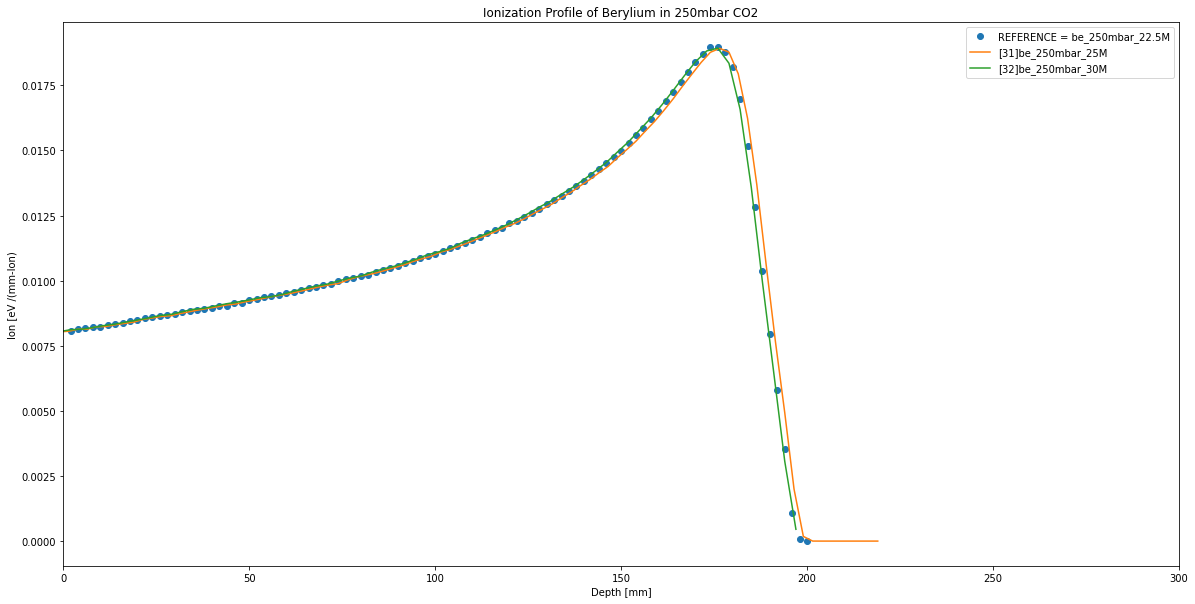

In [31]:
# shifting the data
############# parameters
ref_num = 30
in_list = input_name_list_250
plot_name = 'Berylium in 250mbar CO2'
check_bar = 50
#############
plt.figure(figsize=(20,10))
plt.plot((1/(10**7))*data_frame(new_list(in_list)['path'][ref_num])['Depth'], data_frame(new_list(in_list)['path'][ref_num])['Ionization'], 'o', label= 'REFERENCE = %s'%new_list(in_list)['name'][ref_num])
#############
n_th  = 0
for inFileName in new_list(in_list)['path']:
  ref_depth     = (1/(10**7))*new_range(new_list(in_list)['path'][ref_num], inFileName, 0.005)
  #depth         =   
  ion           = data_frame(inFileName)['Ionization']
  label_name    = new_list(in_list)['name'][n_th]
  index_num     = new_list(in_list).index[n_th]
  if n_th <= ref_num: 
    n_th +=1
    continue
  plt.plot(ref_depth, ion, label= '[%s]%s' %(index_num,label_name))
  n_th  += 1
#############
plt.legend()
plt.xlim(0,300)
plt.ylabel('Ion [eV /(mm-Ion)')
plt.xlabel('Depth [mm]')
plt.title('Ionization Profile of %s'%plot_name)
plt.savefig('/content/drive/MyDrive/Academics/UW-2nd Cycle/Sem 2 - Physics Lab B/ha_plotPictures/Ionz_Profile_%s_shift[25&30]'%plot_name)
plt.show()


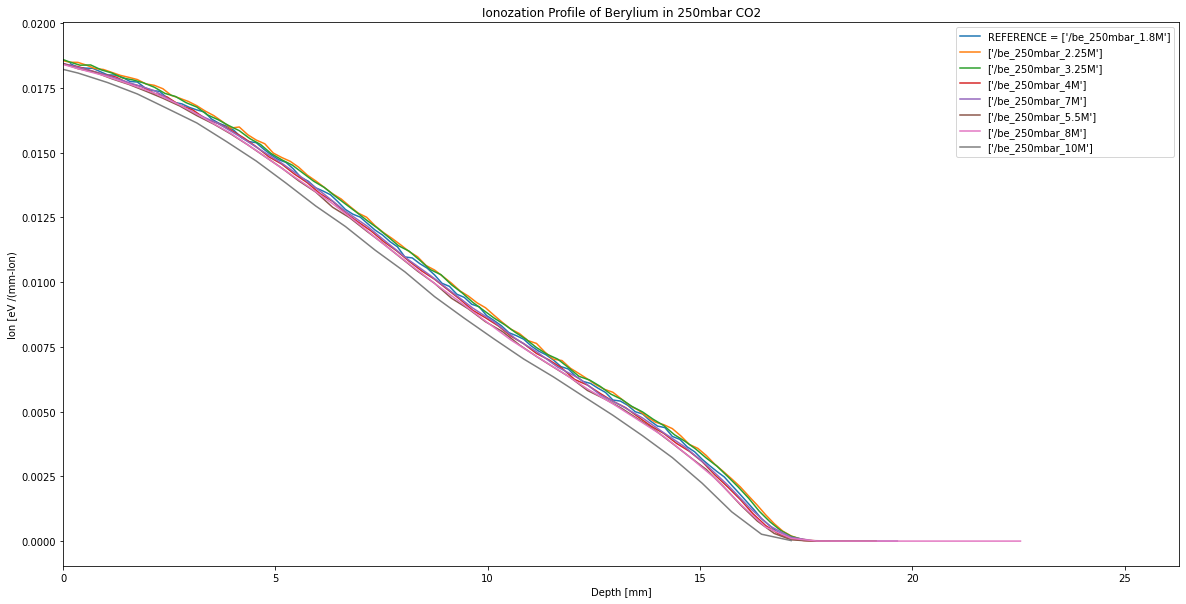

In [17]:
# shifting the data
############ parameters
ref_num = 25
in_list = input_name_list_250
#############
plt.figure(figsize=(20,10))
plt.plot((1/(10**7))*data_frame(in_list[ref_num])['Depth'], data_frame(in_list[ref_num])['Ionization'], label= 'REFERENCE = %s'%outName(in_list[ref_num]))
for inFileName in in_list[ref_num+1:]:
  plt.plot((1/(10**7))*new_range(in_list[ref_num], inFileName, 0.0002), data_frame(inFileName)['Ionization'], label= outName(inFileName))
plt.legend()
plt.xlim(0,)
plt.ylabel('Ion [eV /(mm-Ion)')
plt.xlabel('Depth [mm]')
plt.title('Ionization Profile of Berylium in 250mbar CO2')
plt.savefig('/content/drive/MyDrive/Academics/UW-2nd Cycle/Sem 2 - Physics Lab B/ha_plotPictures/Ionz_Profile_%s'%plot_name)
plt.show()


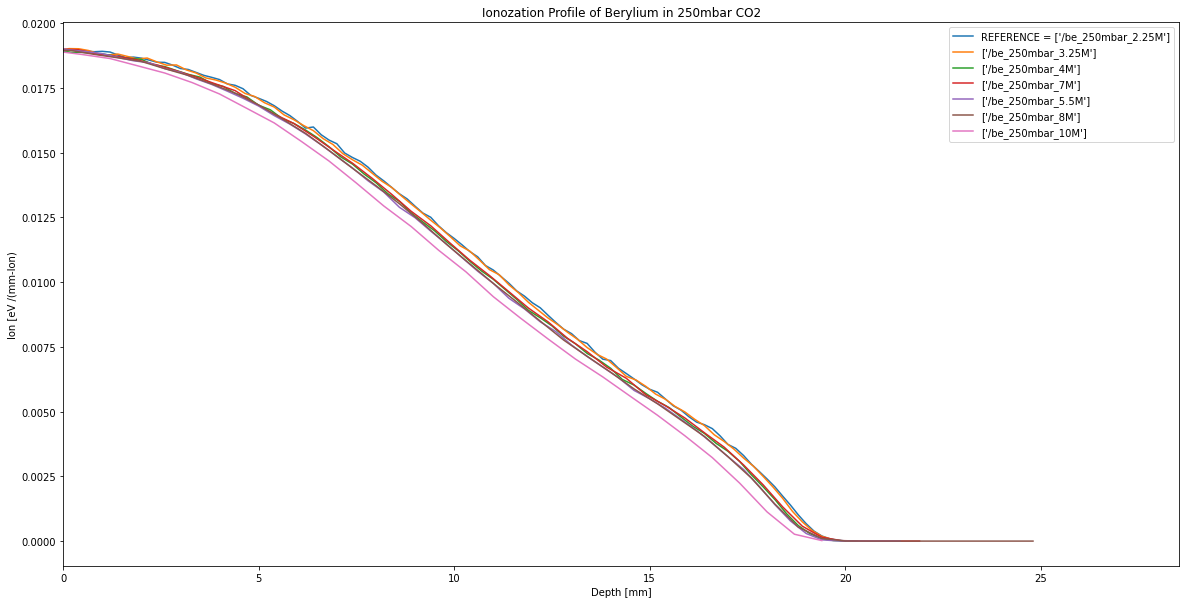

In [18]:
# shifting the data
############ parameters
ref_num = 26
in_list = input_name_list_250
#############
plt.figure(figsize=(20,10))
plt.plot((1/(10**7))*data_frame(in_list[ref_num])['Depth'], data_frame(in_list[ref_num])['Ionization'], label= 'REFERENCE = %s'%outName(in_list[ref_num]))
for inFileName in in_list[ref_num+1:]:
  plt.plot((1/(10**7))*new_range(in_list[ref_num], inFileName, 0.0002), data_frame(inFileName)['Ionization'], label= outName(inFileName))
plt.legend()
plt.xlim(0,)
plt.ylabel('Ion [eV /(mm-Ion)')
plt.xlabel('Depth [mm]')
plt.title('Ionozation Profile of Berylium in 250mbar CO2')
plt.show()


In [19]:
input_path_he80         = '/content/drive/MyDrive/Academics/UW-2nd Cycle/Sem 2 - Physics Lab B/ha_input_he80'
input_name_list_he80   = []
for filename in glob.glob(os.path.join(input_path_he80, '*.csv')):
  input_name_list_he80.append(filename)

input_path_he250         = '/content/drive/MyDrive/Academics/UW-2nd Cycle/Sem 2 - Physics Lab B/ha_input_he250'
input_name_list_he250   = []
for filename in glob.glob(os.path.join(input_path_he250, '*.csv')):
  input_name_list_he250.append(filename)

In [20]:
input_name_list_he250

['/content/drive/MyDrive/Academics/UW-2nd Cycle/Sem 2 - Physics Lab B/ha_input_he250/he_250mbar_0.01M_IONIZ.txt.csv',
 '/content/drive/MyDrive/Academics/UW-2nd Cycle/Sem 2 - Physics Lab B/ha_input_he250/he_250mbar_0.013M_IONIZ.txt.csv',
 '/content/drive/MyDrive/Academics/UW-2nd Cycle/Sem 2 - Physics Lab B/ha_input_he250/he_250mbar_0.016M_IONIZ.txt.csv',
 '/content/drive/MyDrive/Academics/UW-2nd Cycle/Sem 2 - Physics Lab B/ha_input_he250/he_250mbar_0.02M_IONIZ.txt.csv',
 '/content/drive/MyDrive/Academics/UW-2nd Cycle/Sem 2 - Physics Lab B/ha_input_he250/he_250mbar_0.025M_IONIZ.txt.csv',
 '/content/drive/MyDrive/Academics/UW-2nd Cycle/Sem 2 - Physics Lab B/ha_input_he250/he_250mbar_0.03M_IONIZ.txt.csv',
 '/content/drive/MyDrive/Academics/UW-2nd Cycle/Sem 2 - Physics Lab B/ha_input_he250/he_250mbar_0.035M_IONIZ.txt.csv',
 '/content/drive/MyDrive/Academics/UW-2nd Cycle/Sem 2 - Physics Lab B/ha_input_he250/he_250mbar_0.04M_IONIZ.txt.csv',
 '/content/drive/MyDrive/Academics/UW-2nd Cycle/Sem 

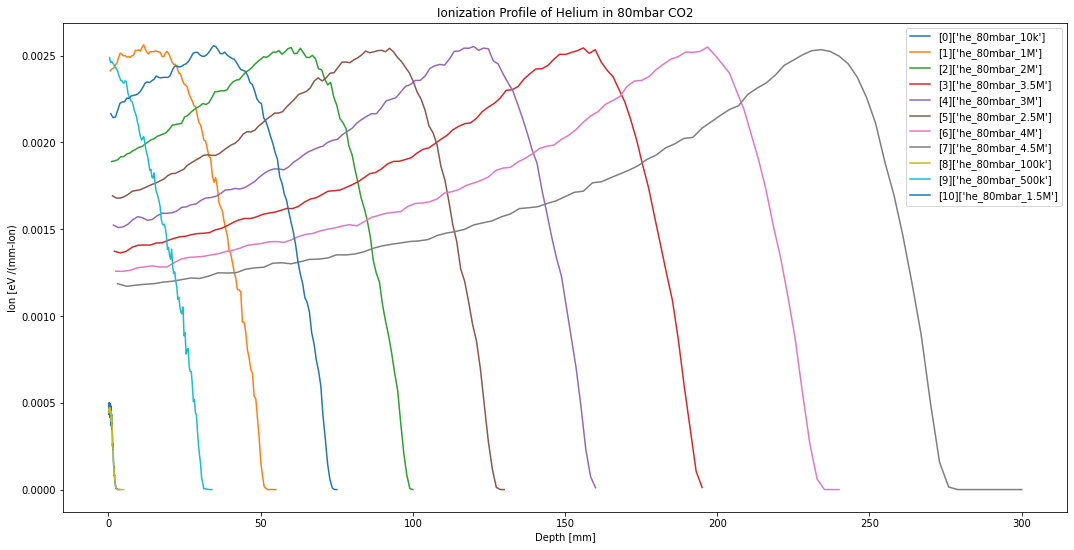

In [21]:
# for 250 mbar data
plt.figure(figsize=(18,9))
############# parameters
ref_num = 10
in_list = input_name_list_he80
#############
n_th  =0
for inFileName in in_list:
  plt.plot((1/(10**7))*data_frame(inFileName)['Depth'], data_frame(inFileName)['Ionization'], label= '[%s]%s' %(n_th,outName(inFileName)))
  n_th +=1
plt.legend()
#plt.xlim(0,300)
plt.ylabel('Ion [eV /(mm-Ion)')
plt.xlabel('Depth [mm]')
plt.title('Ionization Profile of Helium in 80mbar CO2')
plt.show()


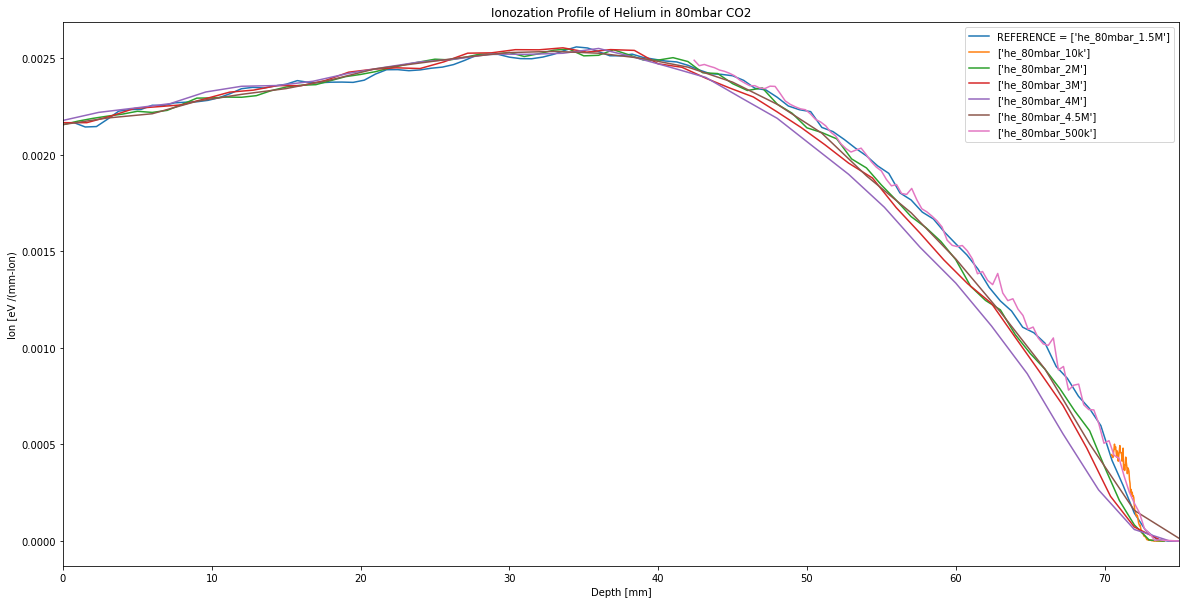

In [22]:
# shifting the data
############# parameters
ref_num = 10
in_list = input_name_list_he80
#############
plt.figure(figsize=(20,10))
plt.plot((1/(10**7))*data_frame(in_list[ref_num])['Depth'], data_frame(in_list[ref_num])['Ionization'], label= 'REFERENCE = %s'%outName(in_list[ref_num]))
n_th = 0
for inFileName in in_list:
  if inFileName==in_list[1] or inFileName==in_list[10] :   # EXCLUDING 5 MeV energy Range and 1 MeV (refference)
    continue
  if inFileName==in_list[3] or inFileName==in_list[5] or inFileName==in_list[8]: #excluding energy range below 1 MeV
    continue
  plt.plot((1/(10**7))*new_range(in_list[ref_num], inFileName, 0.0002), data_frame(inFileName)['Ionization'], label= outName(inFileName))
  n_th += 1
plt.legend()
plt.xlim(0,75)
plt.ylabel('Ion [eV /(mm-Ion)')
plt.xlabel('Depth [mm]')
plt.title('Ionozation Profile of Helium in 80mbar CO2')
plt.show()

Excluded energy range: below 1 MeV and above 5 MeV

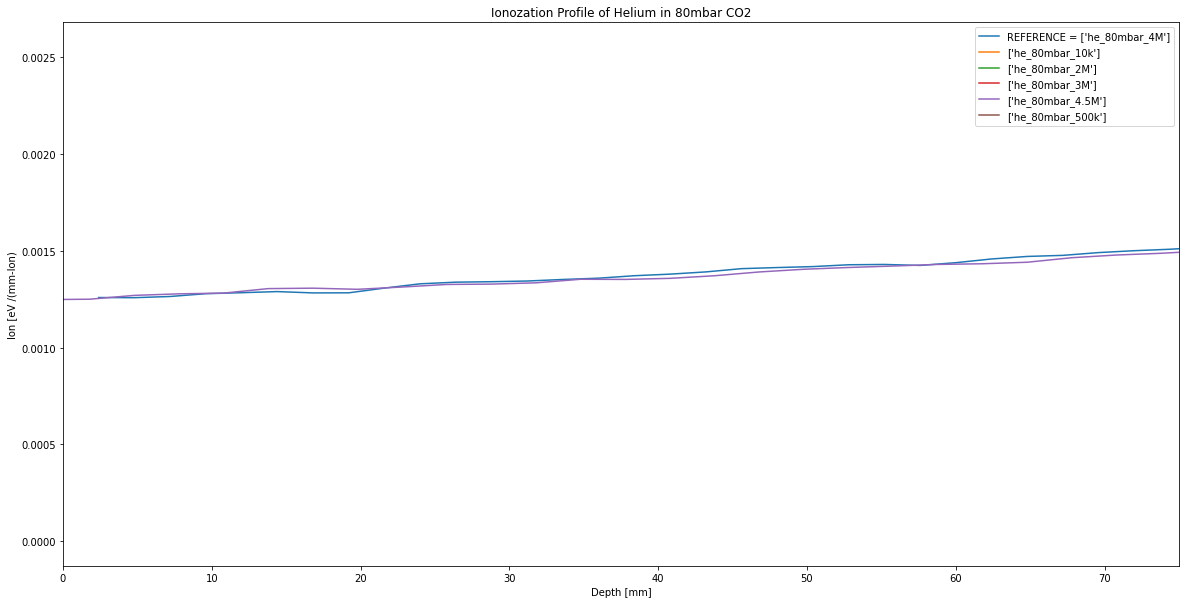

In [23]:
# shifting the data
############# parameters
ref_num = 6
in_list = input_name_list_he80
#############
plt.figure(figsize=(20,10))
plt.plot((1/(10**7))*data_frame(in_list[ref_num])['Depth'], data_frame(in_list[ref_num])['Ionization'], label= 'REFERENCE = %s'%outName(in_list[ref_num]))
n_th = 0
for inFileName in in_list:
  if inFileName==in_list[1] or inFileName==in_list[10] or inFileName==in_list[6]:   # EXCLUDING 5 MeV energy Range and 1 MeV (refference)
    continue
  if inFileName==in_list[3] or inFileName==in_list[5] or inFileName==in_list[8]: #excluding energy range below 1 MeV
    continue
  plt.plot((1/(10**7))*new_range(in_list[ref_num], inFileName, 0.0002), data_frame(inFileName)['Ionization'], label= outName(inFileName))
  n_th += 1
plt.legend()
plt.xlim(0,75)
plt.ylabel('Ion [eV /(mm-Ion)')
plt.xlabel('Depth [mm]')
plt.title('Ionozation Profile of Helium in 80mbar CO2')
plt.show()

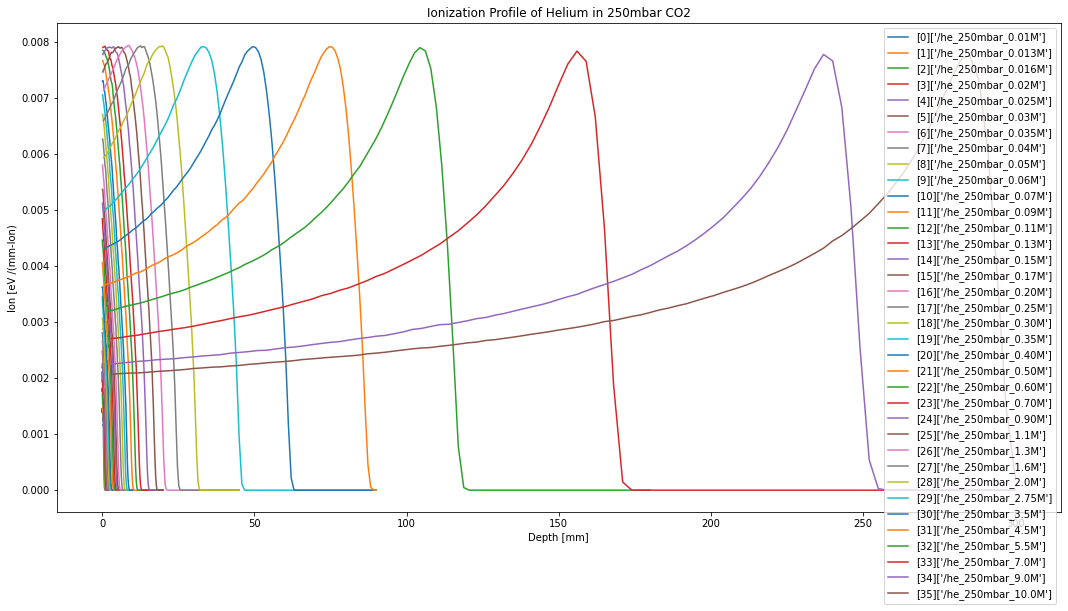

In [24]:
# for 250 mbar data
plt.figure(figsize=(18,9))
############# parameters
ref_num = 0
in_list = input_name_list_he250
#############
n_th  =0
for inFileName in in_list:
  plt.plot((1/(10**7))*data_frame(inFileName)['Depth'], data_frame(inFileName)['Ionization'], label= '[%s]%s' %(n_th,outName(inFileName)))
  n_th +=1
plt.legend()
#plt.xlim(0,300)
plt.ylabel('Ion [eV /(mm-Ion)')
plt.xlabel('Depth [mm]')
plt.title('Ionization Profile of Helium in 250mbar CO2')
plt.show()
